# HW7 
Meichen Fang
## Problem 1
### (A) 
The MST is implemented in below.

In [4]:
def myMST(E,r):
    '''
    directed graph
    V = [0,1,...,len(E)-1]
    E is the weight matrix. Eij=[i,j,wij]
    r is the root index
    '''
    V=list(range(len(E)))
    U=[r]
    T=[]
    L=0
    while len(U)!=len(V):
        edges=[]
        for i in U:
            for e in E[i][:]:
                if e[1] not in U:
                    edges.append(e)
        if len(edges)==0:
            print('not a connected graph')
            break
        edges.sort(key=lambda x: x[2])
        T.append(edges[0])
        U.append(edges[0][1])
        L=L+edges[0][2]
    return T,L 

### (B)
Random graphs are generated:

In [61]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

def gen_G(n):
    E=[]
    for i in range(n):
        Ei=[]
        for j in range(n):
            if np.random.uniform(0, 1)>0.7:
                Ei.append((i,j,np.random.randint(1,20)))
        E.append(Ei)
    return E

Below are graphs(left) and corresponding minimum spanning tree(right) for two example graphs.

67


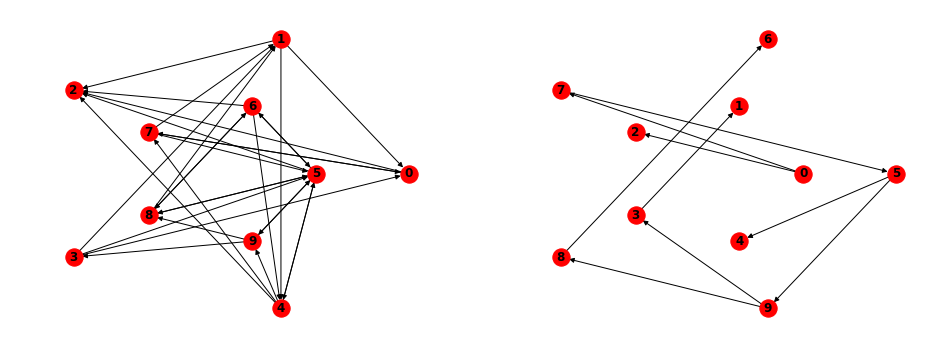

In [62]:
fig=plt.figure(figsize=(16,6))
E=gen_G(10)
G=nx.DiGraph()
for e in E:
    G.add_weighted_edges_from(e)
fig.add_subplot(121)
nx.draw_shell(G,nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

T,L=myMST(E,0)
GT=nx.DiGraph()
GT.add_weighted_edges_from(T)
fig.add_subplot(122)
nx.draw_shell(GT,nlist=[range(5),range(5,10)], with_labels=True, font_weight='bold')

print(L)

79


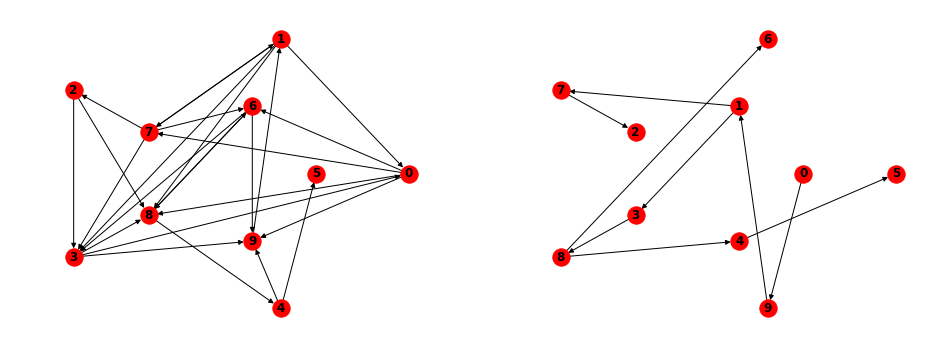

In [65]:
fig=plt.figure(figsize=(16,6))
E=gen_G(10)
G=nx.DiGraph()
for e in E:
    G.add_weighted_edges_from(e)
fig.add_subplot(121)
nx.draw_shell(G,nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

T,L=myMST(E,0)
GT=nx.DiGraph()
GT.add_weighted_edges_from(T)
fig.add_subplot(122)
nx.draw_shell(GT,nlist=[range(5),range(5,10)], with_labels=True, font_weight='bold')

print(L)

### (C) 
Graphs that have more than one minimum spanning tree with same L exist and below is a example.

L of the first MST is 10
L of the second MST is 10


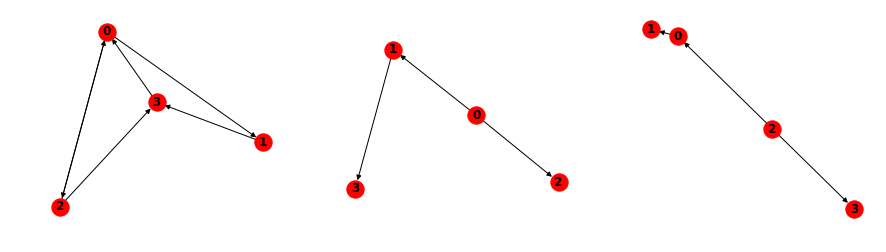

In [85]:
E=[[(0,1,3),(0,2,3)],[(1,3,4)],[(2,0,3),(2,3,4)],[(3,0,8)]]
fig=plt.figure(figsize=(15,4))
G=nx.DiGraph()
for e in E:
    G.add_weighted_edges_from(e)
fig.add_subplot(131)
nx.draw(G, pos=nx.spring_layout(G),with_labels=True, font_weight='bold')

T,L=myMST(E,0)
GT=nx.DiGraph()
GT.add_weighted_edges_from(T)
fig.add_subplot(132)
nx.draw(GT,pos=nx.spring_layout(GT),with_labels=True, font_weight='bold')
print('L of the first MST is',L)

T,L=myMST(E,2)
GT=nx.DiGraph()
GT.add_weighted_edges_from(T)
fig.add_subplot(133)
nx.draw(GT,pos=nx.spring_layout(GT),with_labels=True, font_weight='bold')
print('L of the second MST is',L)
plt.show()

### (D) 
My algorithm in part (A) is deterministic because the sort function in python is stable and it returns a single tree.

## Problem 2
### (A)

we can rewite Q in this form and Svr indicates whether v belongs to the r group. 
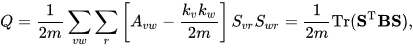
Therefore we can calculate Q by matrix and it takes O(n^2) in time becasue S is sparse. However, in this problem, the n is at most 100 and for loop is also dorable and easier.

In [1]:
A=[[1,0,0],[0,1,1],[1,1,1]]
m=np.sum(A)
print(m)
k=np.matrix(np.sum(A,axis=1))

K=np.matmul(np.transpose(k),k)

B=A-K/m
print(B)
print(neighbor=np.argwhere(A[i][:]>0))

NameError: name 'np' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def mylouvain(A):
    m=np.sum(A)
    k=np.matrix(np.sum(A,axis=1))
    K=np.matmul(np.transpose(k),k)
    B=(A-K/m)/m #Q=B*delta
    c=list(range(len(A)))
    iterate=1
    while iterate:
        for i in range(len(c)):
            neighbor=np.argwhere(A[i][:]>0)